In [23]:
%load_ext autoreload
%autoreload 2

# Import necessary modules and functions from your custom scripts
from scripts.arima_import import *
from scripts.ARIMAForecasterV2 import *

# Import the 'datetime' module for date and time-related operations
from datetime import datetime

# Create a DataLoader object
dl = DataLoader('../data/database.db')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Please provide the date range

In [2]:
date_range = {"start": "2008-12-01", "end": "2018-12-01"}

Initializing required definitions

#### Function: `shift_lags_for_enso(df, factor, lags=24)`
Creates lagged features in a DataFrame for a given factor.

#### Function: `model_initialize(df, endog, exog)`
Initializes a SARIMA forecasting model using provided data, endogenous, and exogenous variables.

#### Function: `find_optimal_lags(model, date_range, name, order_range=range(1, 12), with_exog=True)`
Determines optimal lag orders for a SARIMA model, plots performance metrics, and considers exogenous variables if specified.

#### Function: `plot_pred_vs_forecast(model, date_range, with_exog)`
Plots predictions and forecasts generated by a SARIMA model, including the option to consider exogenous variables.

#### Function: `prepare_data(table, climate_index, commodity)`
Prepares and merges data from a SQL database for analysis, incorporating climate indices and commodities, and adds lagged features.

#### Function: `run_tests_optimal_lag_order(data, endog, exog, with_exog)`
Runs a series of tests for SARIMA modeling, including lag order optimization and prediction plotting.

These functions are also available in `scripts.utils.py`.

In [19]:
def shift_lags_for_enso(df, factor, lags=24):
    df_copy = df.copy()
    for lag in range(1, lags+1):
        df_copy[f"{factor}_{lag}"] = df_copy[factor].shift(lag)
    return df_copy

def model_initialize (df, endog, exog):

    return SARIMAForecaster(data=df, endog=endog, exog=exog)

def find_optimal_lags (model, date_range, name, order_range = range(1, 12), with_exog = True ):

    evaluation_result1 = model.find_optimal_lag_for_endog(date_range=date_range, matrix="rmse", order_range=range(1, 12))
    fig1 = model.plot_order_performance(evaluation_result1, title=f"Lag Performance Metrics for {name} log Return without ENSO, order={model.order}")

    if (with_exog):
        # 2. find optimal lag for enso
        evaluation_result2 = model.find_optimal_lag_for_exog(date_range)
        fig2 = model.plot_order_performance(evaluation_result2, title=f"Lag Performance Metrics for {name} log Return with ENSO, order={model.order}, enso_lag={model.exog}")
    
        
def plot_pred_vs_forecast(model, date_range, with_exog):
    
    forecasts = model.one_step_ahead_forecastings(date_range = date_range, with_exog = with_exog)
    model.plot_predictions(forecasts=forecasts, date_range=date_range )


def prepare_data(table, climate_index, commodity):

    df = pd.read_sql_query(f"SELECT * FROM {table}", dl.conn,
                       index_col='index', parse_dates='index')
    
    teleconnection = pd.read_sql_query("SELECT * FROM jra55", dl.conn,
                       index_col='date', parse_dates='index')

    chosen_index =  teleconnection[[climate_index]]
    chosen_index = chosen_index.loc['1970-01-01':'2018-12-01']

    df.index = pd.to_datetime(df.index)
    chosen_index.index = pd.to_datetime(chosen_index.index)

    result = df.merge(chosen_index[[f'{climate_index}']], left_index=True, right_index=True, how='left')

    commodity = result[[commodity, climate_index]]
    commodity_with_lags = shift_lags_for_enso(commodity, climate_index, lags=12)

    return commodity_with_lags

def run_tests_optimal_lag_order(data, endog, exog, with_exog):

    model = model_initialize(data, endog, exog)
    find_optimal_lags(model, date_range=date_range ,name=endog , with_exog=with_exog)
    plot_pred_vs_forecast(model, date_range=date_range, with_exog=with_exog)


- `lr_commodity`: This variable represents the log returns of any commodity. It's used to track the logarithmic returns of a specific commodity, providing insights into its price movements.
  
- `real_commodity`: This variable represents the inflation-adjusted value of any commodity. It allows for the measurement of a commodity's value while accounting for changes in purchasing power due to inflation.


# Seasoned Log Returns

### without inflation adjustment

In [59]:
commodity_with_lags = prepare_data('commdity_log_returns_with_undeseaonalised_cpi', 'sam_index', 'lr_maize' )

Processing lag values:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best lag: 1


Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

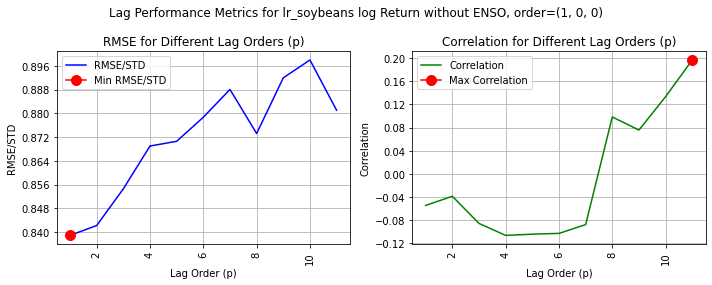

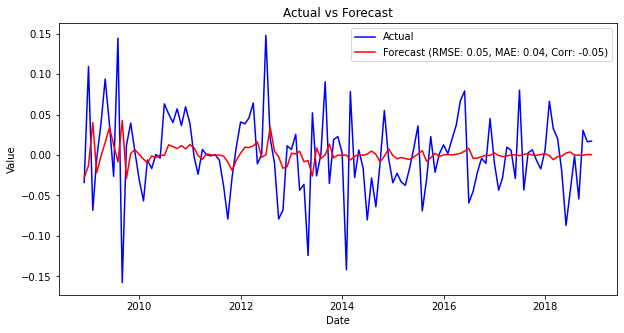

In [47]:
#without exo
run_tests_optimal_lag_order(data = commodity_with_lags,
                             endog = 'lr_maize',
                            exog = None,
                            with_exog = False)

Processing lag values:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best lag: 1


Processing ENSO lags:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best ENSO lag: sam_index_3


Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

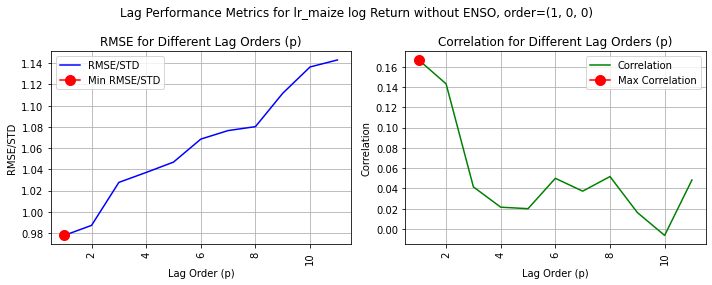

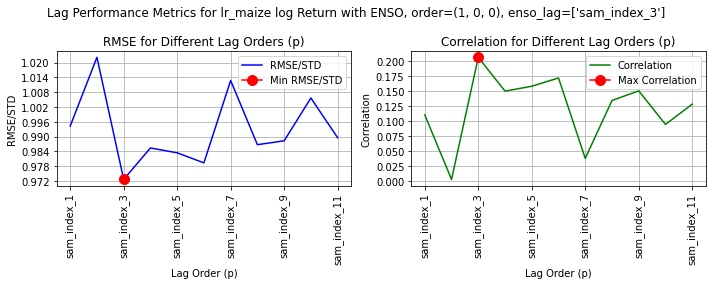

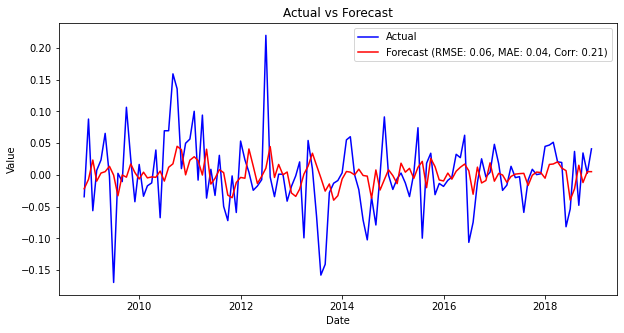

In [60]:
#with exo
run_tests_optimal_lag_order(data = commodity_with_lags,
                             endog = 'lr_maize',
                            exog = [f'sam_index_{i}' for i in range(1, 12)],
                            with_exog = True)

###  inflation adjustment

In [49]:
commodity_with_lags = prepare_data('commdity_log_returns_with_undeseaonalised_cpi', 'sam_index', 'real_maizes' )

Processing lag values:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best lag: 1


Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

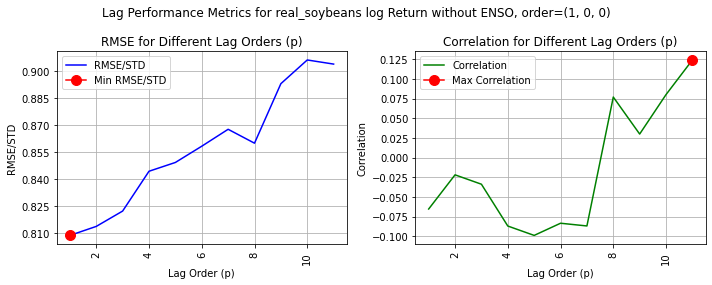

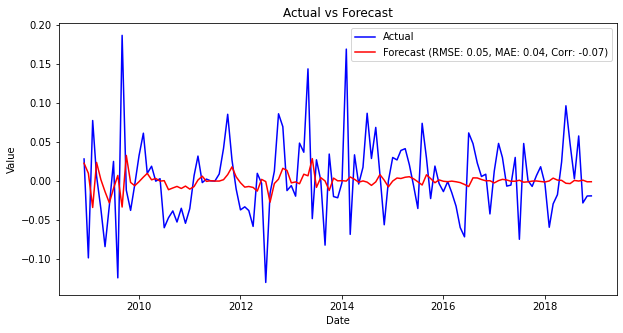

In [50]:
#without exo
run_tests_optimal_lag_order(data = commodity_with_lags,
                             endog = 'real_maizes',
                            exog = None,
                            with_exog = False)

Processing lag values:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best lag: 1


Processing ENSO lags:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best ENSO lag: sam_index_8


Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

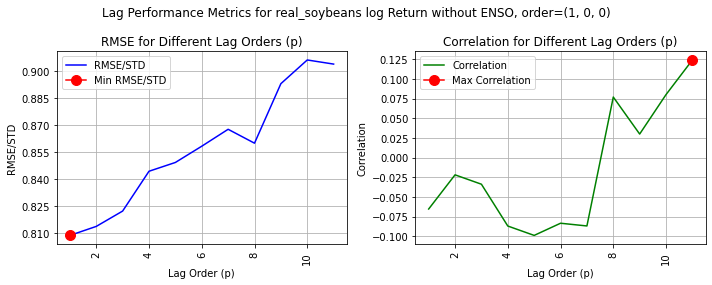

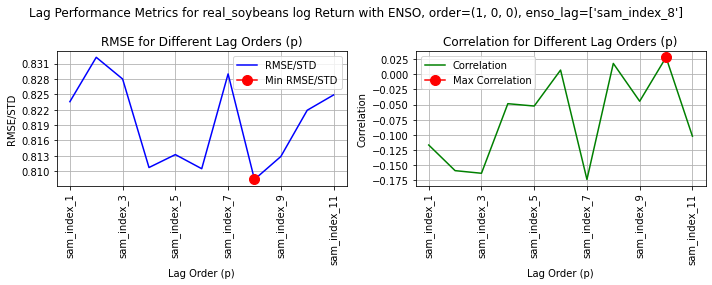

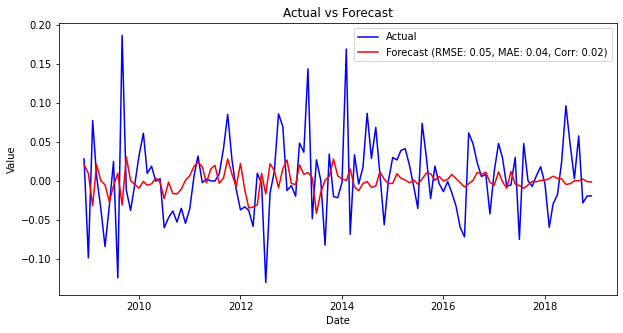

In [51]:
#with exo
run_tests_optimal_lag_order(data = commodity_with_lags,
                             endog = 'real_maizes',
                            exog = [f'sam_index_{i}' for i in range(1, 12)],
                            with_exog = True)

# DeSeasoned Log Returns

### without inflation adjustment

In [52]:
commodity_with_lags = prepare_data('deseasonalised_commodity_log_return_with_undeseasonalised_cpi', 'sam_index', 'lr_maize' )

Processing lag values:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best lag: 1


Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

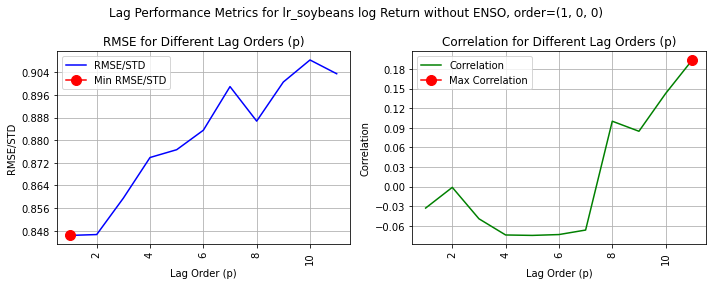

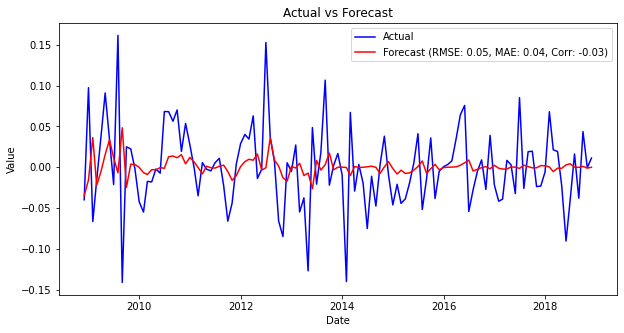

In [53]:
#without exo
run_tests_optimal_lag_order(data = commodity_with_lags,
                             endog = 'lr_maize',
                            exog = None,
                            with_exog = False)

Processing lag values:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best lag: 1


Processing ENSO lags:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best ENSO lag: sam_index_8


Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

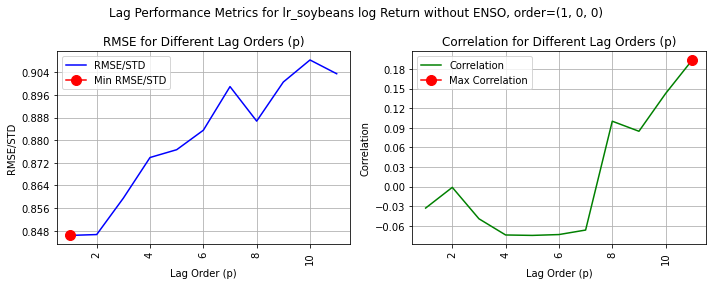

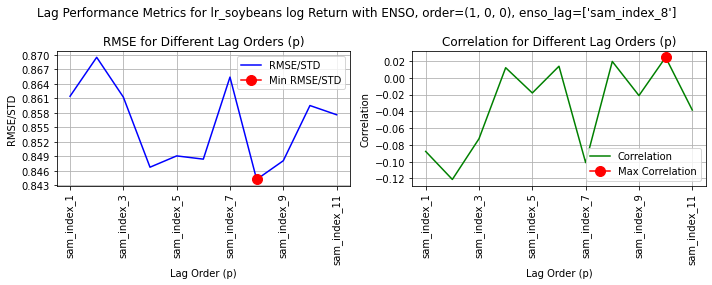

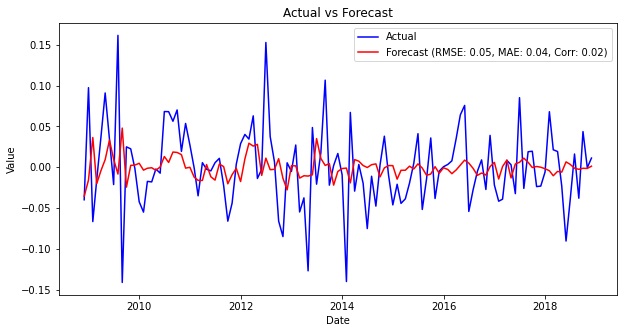

In [54]:
#with exo
run_tests_optimal_lag_order(data = commodity_with_lags,
                             endog = 'lr_maize',
                            exog = [f'sam_index_{i}' for i in range(1, 12)],
                            with_exog = True)

### inflation adjustment

In [55]:
commodity_with_lags = prepare_data('deseasonalised_commodity_log_return_with_undeseasonalised_cpi', 'sam_index', 'real_maizes' )

Processing lag values:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best lag: 1


Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

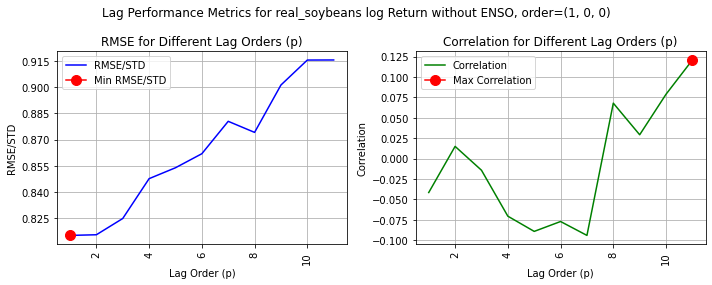

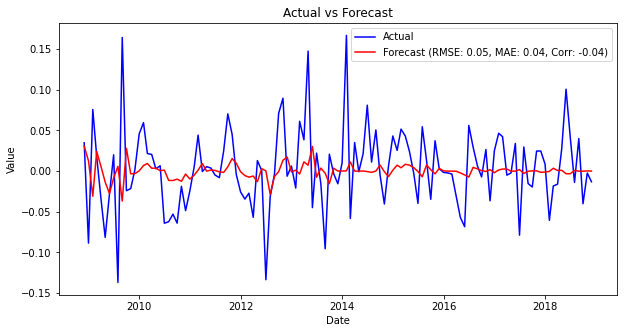

In [56]:
#without exo
run_tests_optimal_lag_order(data = commodity_with_lags,
                             endog = 'real_maizes',
                            exog = None,
                            with_exog = False)

Processing lag values:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best lag: 1


Processing ENSO lags:   0%|          | 0/11 [00:00<?, ?it/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

Setting the best ENSO lag: sam_index_8


Forecasting:   0%|          | 0/121 [00:00<?, ?month/s]

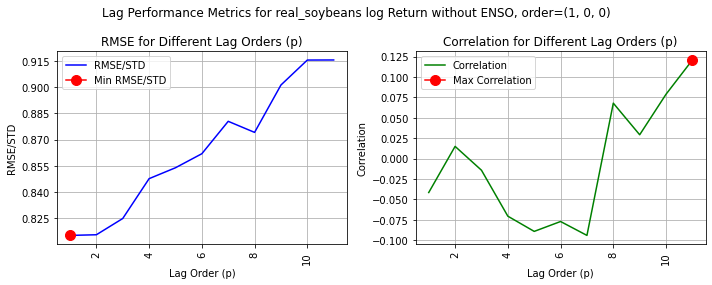

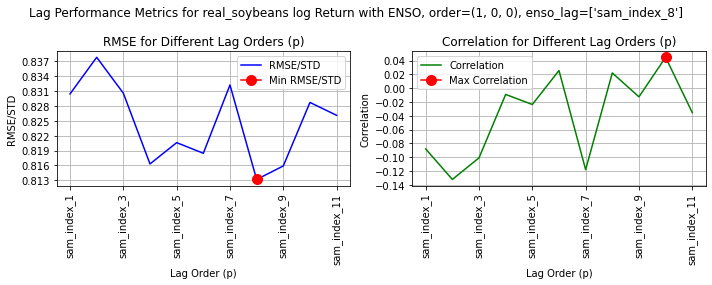

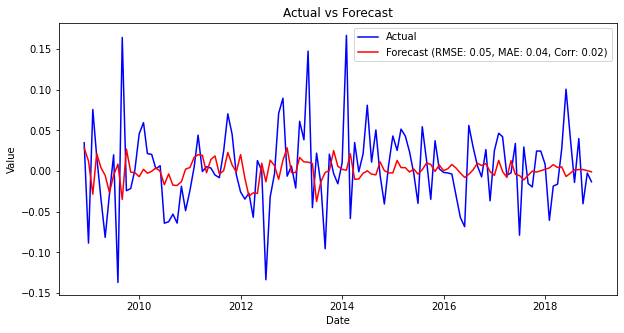

In [57]:
#with exo
run_tests_optimal_lag_order(data = commodity_with_lags,
                             endog = 'real_maizes',
                            exog = [f'sam_index_{i}' for i in range(1, 12)],
                            with_exog = True)